The Autocorrelation Function `ACF` helps understanding how current values in a series relate to past values.

`ARIMA modeling`: ACF helps identify the MA (moving average) order.  
`Seasonality detection`: Peaks at regular lags suggest cycles (e.g., weekly, monthly).  
`Residual diagnostics`: ACF of residuals should resemble white noise if the model fits well. Significant autocorrelation in residuals → model misspecification.   
`Stationarity Detection` : A slowly decaying ACF implies Non-stationarity. May require differencing or transformation.  
`Anomaly Detection` : Sudden spikes or drops in ACF at unexpected lags may indicate Outliers, Structural breaks, Data corruption etc.

`Note:` In ARIMA, ACF guides the q (MA) component, while PACF informs p (AR).

In [8]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

df = pd. read_csv("index2018.csv")
df.head(3)

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25


Below are common `date preparation steps` that are applied to any time series

In [9]:
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y")
df.set_index('date',inplace=True)
df = df.asfreq('b')

#handling NAs
for col in df.columns.to_list():
    df[col] = df[col].fillna(method='ffill')
    df[col] = df[col].fillna(method='bfill')

df.isna().sum(axis=0)    

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [13]:
import statsmodels.graphics.tsaplots as sgt
import matplotlib.pyplot as plt

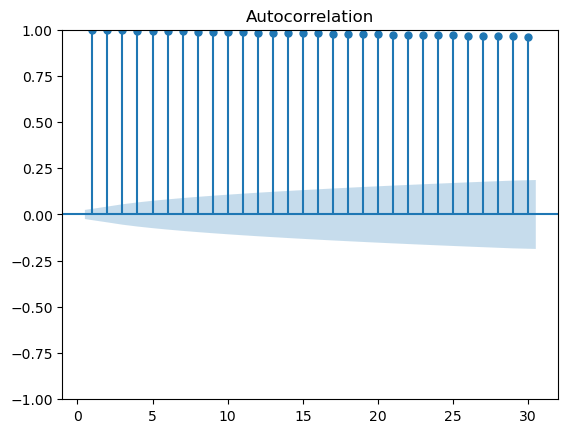

In [23]:
sgt.plot_acf(df['spx'],lags = 30, zero=False) # zero=False avoids plotting the zeroth lag
plt.show()

The blue shaded area represents the area of insignificance. if the tip of corelation lines for any lag ends within the shaded ares, the autocorrelation is insignificant for that lag.  
The shaded area broadens as we move towards `right` indicating the requirement of a relatively larger correlation coefficient (y-axis) to remain significant compared to the lags towards the `left`.

Let's check `ACF` for `White Noise`

In [25]:
import numpy as np
# Generating White noise
wn = np.random.normal(loc=100,scale=20,size=len(df))

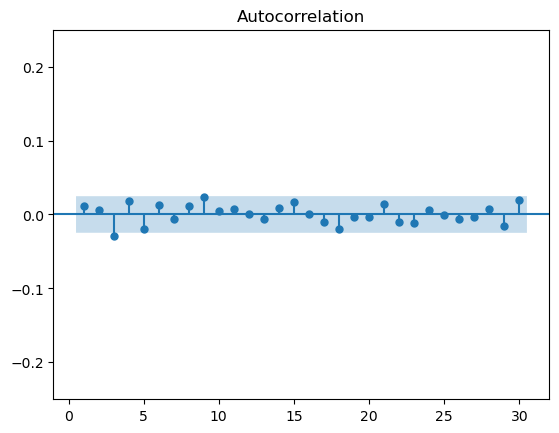

In [27]:
sgt.plot_acf(pd.Series(wn),lags = 30, zero=False) # zero=False avoids plotting the zeroth lag
plt.ylim(-0.25,0.25)
plt.show()

No significant autocorrelation observed with white noise which aligns with the definition of white noise. A series with `constant mean`, `constant variance` and **no autocorrelation** is qualified to be called white noise.

Let's check `ACF` for `Random Walk`

In [30]:
# Generating random walk
n = len(df)  # number of steps
steps = np.random.randn(n)  # normally distributed steps
walk = np.cumsum(steps)

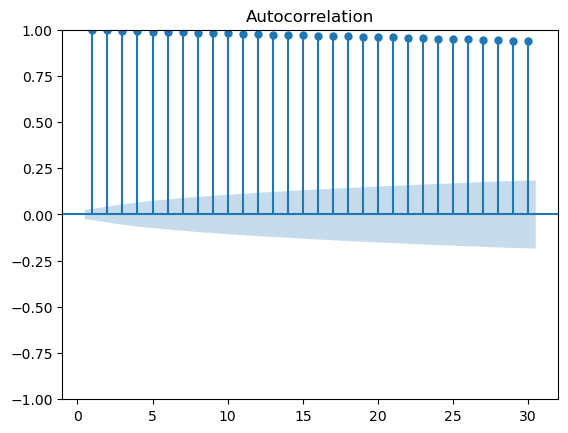

In [31]:
sgt.plot_acf(pd.Series(walk),lags = 30, zero=False) # zero=False avoids plotting the zeroth lag
# plt.ylim(-0.25,0.25)
plt.show()

Significant autocorrelation for random walk indicate `non-stationarity`.

Why **Partial Autocorrelation Function[PACF]** is needed? Because `ACF` for any lag shows both direct and indirect effects. For example, `Direct effect` for 5th lag on the time series is the effect only by the 5th lagged seties while `Indirect effect` is the effect of all the other lagged components in between (4th, 3rd, 2nd lagged series) on the time series.  
To isolate and understand only the direct effect, we use `PACF`.

**PACF** can be helpful in below cases.  
`AR Process` : A sharp cutoff in PACF after lag 𝑝 suggests an AR(𝑝) process. For example, if PACF shows significant values at lags 1 and 2, but drops off after, you might choose AR(2).  

`Pure Correlation` : Measures the pure correlation between a time series and its lagged version unlike ACF.  
`Model evaluation` : After fitting the model, PACF of residuals should show no significant spikes. Significant partial autocorrelation in residuals → model may be underfitting.  
`Seasonality Detection` : PACF can reveal seasonal lags more clearly than ACF when indirect effects obscure patterns.




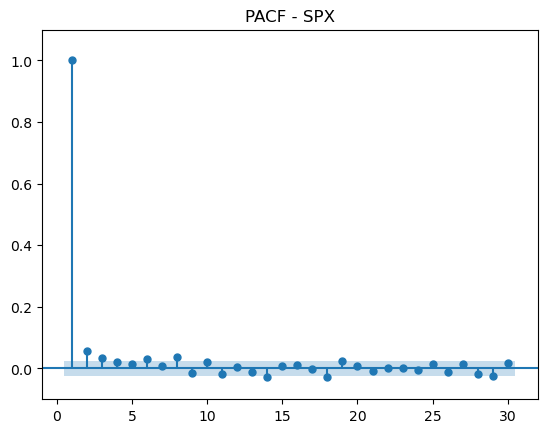

In [38]:
sgt.plot_pacf(df['spx'],lags = 30, zero=False,method=('ols'),title= 'PACF - SPX') # zero=False avoids plotting the zeroth lag
plt.ylim(-0.1,1.1)
plt.show()

The above `PACF` plot indicates that only the 1st and 2nd lags are significant when looking at direct effects.

By definition of `white noise`, the PACF should show no significant correlation.

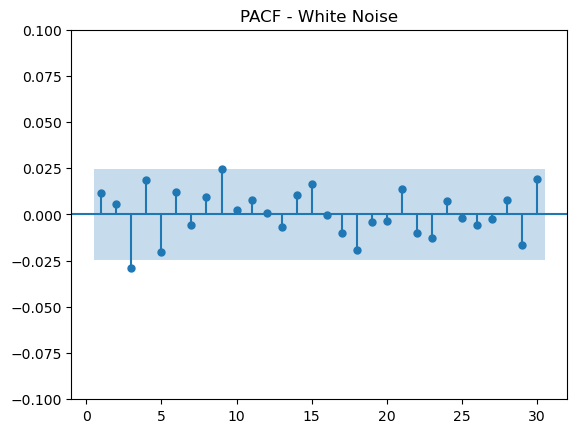

In [40]:
sgt.plot_pacf(pd.Series(wn),lags = 30, zero=False,method=('ols'),title= 'PACF - White Noise') # zero=False avoids plotting the zeroth lag
plt.ylim(-0.1,0.1)
plt.show()

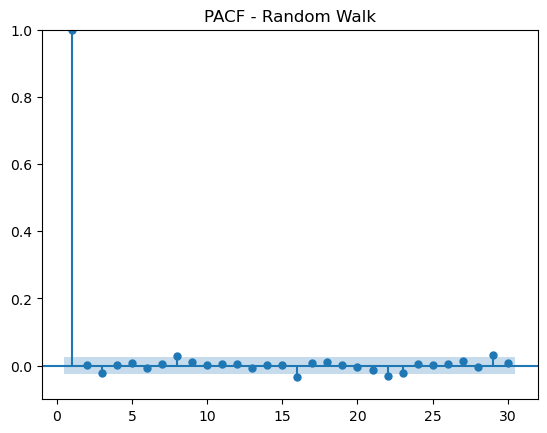

In [42]:
sgt.plot_pacf(pd.Series(walk),lags = 30, zero=False,method=('ols'),title= 'PACF - Random Walk') # zero=False avoids plotting the zeroth lag
plt.ylim(-0.1,1)
plt.show()

Based on the definition of `random walk` which says 'any value in randow walk is defined mainly by previous value in the series', the above PACF plot indicates that random walk series is highly corrrelated with 1 lagged series.

RW<sub>T</sub> = Value<sub>T-1</sub> + Random value<sub>T</sub>